# 1. Install and Import Dependencies

In [2]:
pwd

'/content'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install torch   torchvision torchaudio  -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


In [2]:
cd /content/drive/MyDrive/yolo

/content/drive/MyDrive/yolo


In [6]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16495, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 16495 (delta 30), reused 36 (delta 9), pack-reused 16408
Receiving objects: 100% (16495/16495), 15.11 MiB | 14.39 MiB/s, done.
Resolving deltas: 100% (11295/11295), done.


In [7]:
pwd

'/content/drive/MyDrive/yolo'

In [3]:
cd yolov5

/content/drive/MyDrive/yolo/yolov5


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="qxnrxtBrAxq9RPNwGhCz")
project = rf.workspace("eyetrackerobjectdetectionyolo").project("open-closed-eye-od")
dataset = project.version(3).download("yolov5")


loading Roboflow workspace...
loading Roboflow project...


In [5]:
pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.3/716.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00


In [6]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [7]:
pwd

'/content/drive/MyDrive/yolo/yolov5'

In [8]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-3-2 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 105MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [9]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [10]:
img = '/content/drive/MyDrive/yolo/yolov5/data/images/zidane.jpg'

In [12]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 15.9ms pre-process, 7.3ms inference, 2.1ms NMS per image at shape (1, 3, 384, 640)


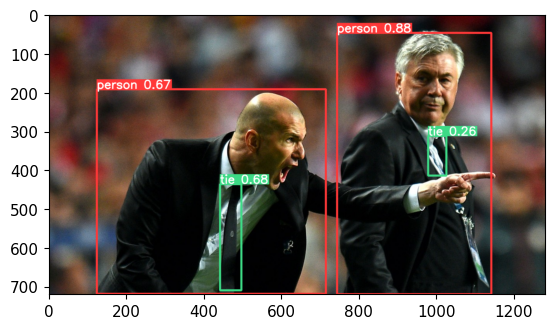

In [13]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [14]:
results.render()

[array([[[72, 48, 38],
         [74, 50, 40],
         [73, 51, 40],
         ...,
         [56, 21, 25],
         [55, 19, 21],
         [51, 15, 17]],
 
        [[71, 47, 37],
         [71, 47, 37],
         [70, 48, 37],
         ...,
         [55, 20, 24],
         [52, 16, 18],
         [47, 11, 13]],
 
        [[75, 51, 41],
         [73, 49, 39],
         [70, 48, 37],
         ...,
         [56, 20, 24],
         [52, 16, 20],
         [48, 12, 16]],
 
        ...,
 
        [[40, 43, 48],
         [41, 44, 49],
         [40, 43, 48],
         ...,
         [35, 49, 49],
         [35, 49, 49],
         [36, 50, 50]],
 
        [[39, 42, 49],
         [39, 42, 49],
         [39, 42, 49],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]],
 
        [[38, 41, 48],
         [38, 41, 48],
         [38, 41, 48],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]]], dtype=uint8)]

# 5. Train from scratch

In [15]:
!pip install pyqt5 lxml --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 10.6 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.4
    Uninstalling lxml-4.9.4:
      Successfully uninstalled lxml-4.9.4


In [16]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat {dataset.location}/data.yaml

names:
- closed eye
- closed_eye
- open eye
- open_eye
nc: 4
roboflow:
  license: CC BY 4.0
  project: open-closed-eye-od
  url: https://universe.roboflow.com/eyetrackerobjectdetectionyolo/open-closed-eye-od/dataset/3
  version: 3
  workspace: eyetrackerobjectdetectionyolo
test: ../test/images
train: Open/Closed-eye-OD-3/train/images
val: Open/Closed-eye-OD-3/valid/images


In [17]:
pwd

'/content/drive/MyDrive/yolo/yolov5'

In [18]:
!python train.py --img 320 --batch 16 --epochs 200 --data {dataset.location}/data.yaml --weights yolov5s.pt --workers 2

2024-03-02 05:32:50.176228: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-02 05:32:50.176280: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-02 05:32:50.178300: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/yolo/yolov5/Open/Closed-eye-OD-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=F

# 6. Load Custom Model

In [20]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/yolo/yolov5/runs/train/exp/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-3-2 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [21]:
img = "/content/drive/MyDrive/project/project1/train/open1.jpg"

In [22]:
results = model(img)

In [23]:
results.print()

image 1/1: 183x275 2 open eyes
Speed: 835.4ms pre-process, 49.0ms inference, 1.4ms NMS per image at shape (1, 3, 448, 640)


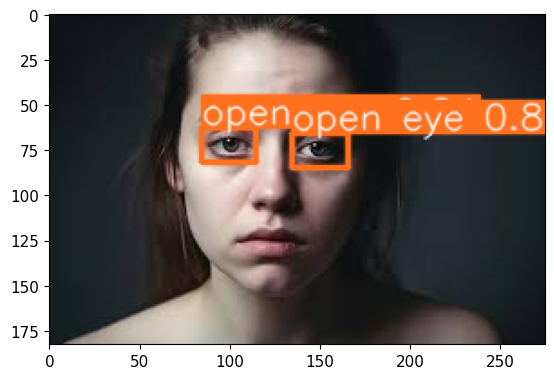

In [24]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [25]:
img1 = "/content/drive/MyDrive/project/project1/train/close1.jpg"
results1 = model(img1)
results1.print()

image 1/1: 192x262 2 closed eyes
Speed: 238.6ms pre-process, 48.3ms inference, 1.4ms NMS per image at shape (1, 3, 480, 640)


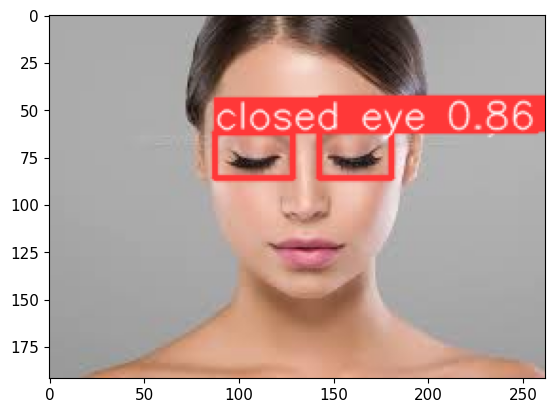

In [26]:
%matplotlib inline
plt.imshow(np.squeeze(results1.render()))
plt.show()

In [27]:
!pip install -U coremltools onnx scikit-learn==0.19.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 47.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
ERROR: Could not build wheels for scikit-learn, which is required to install pyproject.toml-based projects


In [28]:
!python export.py --weights /content/drive/MyDrive/yolo/yolov5/runs/train/exp/weights/best.pt   --data data/data.yaml

export: data=data/data.yaml, weights=['/content/drive/MyDrive/yolo/yolov5/runs/train/exp/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript']
YOLOv5 🚀 v7.0-288-gb9392361 Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from /content/drive/MyDrive/yolo/yolov5/runs/train/exp/weights/best.pt with output shape (1, 25200, 9) (13.6 MB)

TorchScript: starting export with torch 2.1.0+cu121...
TorchScript: export success ✅ 2.8s, saved as /content/drive/MyDrive/yolo/yolov5/runs/train/exp/weights/best.torchscript (27.2 MB)

Export complete (3.8s)
Results saved to /content/drive/MyDrive/yolo/yolov5/runs/train/exp/weight

In [37]:
!python detect.py --weights /content/drive/MyDrive/yolo/yolov5/runs/train/exp/weights/best.pt --source /content/drive/MyDrive/yolo/yolov5/Open/Closed-eye-OD-3/test/images --hide-conf

detect: weights=['/content/drive/MyDrive/yolo/yolov5/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/yolo/yolov5/Open/Closed-eye-OD-3/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=True, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-288-gb9392361 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/67 /content/drive/MyDrive/yolo/yolov5/Open/Closed-eye-OD-3/test/images/closed_eye_0683-jpg_face_1_jpg.rf.347ffb87bcc49e823b0c36d2464831cd.jpg: 640x640 2 closed eyes, 11.5ms
image 2/67 /content/drive/MyDrive/yolo/yolov5/Open/Closed-eye-OD-3

In [33]:
!python detect.py --weights /content/drive/MyDrive/yolo/yolov5/runs/train/exp/weights/best.pt --source /content/drive/MyDrive/project/video.mp4

detect: weights=['/content/drive/MyDrive/yolo/yolov5/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/project/video.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-288-gb9392361 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/1121) /content/drive/MyDrive/project/video.mp4: 384x640 2 open eyes, 51.1ms
video 1/1 (2/1121) /content/drive/MyDrive/project/video.mp4: 384x640 2 open eyes, 7.6ms
video 1/1 (3/1121) /content/drive/MyDrive/project/video.mp4: 384x640 2 open eyes, 7.5ms
video 1/

In [34]:
!python val.py --weights /content/drive/MyDrive/yolo/yolov5/runs/train/exp/weights/best.pt --data {dataset.location}/data.yaml

val: data=/content/drive/MyDrive/yolo/yolov5/Open/Closed-eye-OD-3/data.yaml, weights=['/content/drive/MyDrive/yolo/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-288-gb9392361 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/yolo/yolov5/Open/Closed-eye-OD-3/valid/labels.cache... 155 images, 0 backgrounds, 0 corrupt: 100% 155/155 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 5/5 [00:08<00:00,  1.65s/it]
                   all        155        310      0.707       0.27      0.502      0.257
      

In [ ]:
from google.colab.patches import cv2_imshow
cap = cv2.VideoCapture('0')
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = model(frame)

    cv2_imshow(np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()